# 4.19.x Final Assignment

In [130]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")
sns.set_theme()
sns.set(rc={'figure.figsize':(15, 9)})
sns.set(font_scale=1.5) 

### Part 1

The `food_consumption.csv` dataset from the `food` folder contains data on the several countries' food consumption per food category and their respective CO2 emissions. Load it to a DataFrame named `food` and check its contents.

In [2]:
food = pd.read_csv('data/food_consumption.csv')
print(food.head())
print(f"The dataset has {food.columns.size} columns which are {food.columns.values} and has {food.shape[0]} records.")
#print("Nulls or NaN?:")
#print(food.isna().any())
#print(food.isnull().any())
print(food["country"].unique().size)

     country food_category  consumption  co2_emission
0  Argentina          pork        10.51         37.20
1  Argentina       poultry        38.66         41.53
2  Argentina          beef        55.48       1712.00
3  Argentina     lamb_goat         1.56         54.63
4  Argentina          fish         4.36          6.96
The dataset has 4 columns which are ['country' 'food_category' 'consumption' 'co2_emission'] and has 1430 records.
130


1. Use the `.describe()` method on the `food` DataFrame to produce descriptive statistics about the `consumption` metric for each class in the `food_category` variable. **Which `food_category` has the highest median value of `food_consumption`?** 

In [4]:
food.groupby(["food_category"])[["consumption","co2_emission"]].describe()

consumption                                                 \
                    count        mean        std   min      25%      50%   
food_category                                                              
beef                130.0   12.123385   9.654140  0.78   4.9975    8.285   
dairy               130.0  125.774692  93.327721  3.04  45.7925  110.975   
eggs                130.0    8.163769   5.032582  0.16   3.9450    8.420   
fish                130.0   17.287077  19.013508  0.24   6.0250   13.950   
lamb_goat           130.0    2.600154   3.665252  0.00   0.5600    1.325   
nuts                130.0    4.137231   3.372817  0.18   1.8050    3.495   
pork                130.0   16.123692  15.717646  0.00   2.0900   10.355   
poultry             130.0   21.219231  14.571980  0.47  10.9100   19.855   
rice                130.0   29.375154  37.324471  0.95   4.7200   11.875   
soybeans            130.0    0.860538   2.083336  0.00   0.0100    0.075   
wheat               130.0   71.549538  44.191318  2.74  37.0450   69.420   

                                co2_emission                                 \
                    75%     max        count        mean         std    min   
food_category                                                                 
beef            17.9400   55.48        130.0  374.102000  297.906710  24.07   
dairy          192.7150  430.76        130.0  179.153846  132.935669   4.33   
eggs            12.3125   19.15        130.0    7.499615    4.622966   0.15   
fish            21.8525  179.71        130.0   27.601692   30.358481   0.38   
lamb_goat        3.1025   21.12        130.0   91.056769  128.356996   0.00   
nuts             5.6100   23.03        130.0    7.323000    5.969895   0.32   
pork            28.2275   67.11        130.0   57.070077   55.632396   0.00   
poultry         29.7475   62.50        130.0   22.793538   15.653332   0.50   
rice            43.4425  171.73        130.0   37.591615   47.763754   1.22   
soybeans         0.6400   16.95        130.0    0.387308    0.938020   0.00   
wheat          103.3725  197.50        130.0   13.644462    8.427570   0.52   

                                                     
                    25%      50%       75%      max  
food_category                                        
beef           154.2150  255.655  553.5925  1712.00  
dairy           65.2275  158.075  274.5000   613.57  
eggs             3.6225    7.735   11.3075    17.59  
fish             9.6225   22.270   34.8925   286.94  
lamb_goat       19.6100   46.405  108.6475   739.62  
nuts             3.1975    6.185    9.9325    40.76  
pork             7.3950   36.650   99.9150   237.54  
poultry         11.7200   21.325   31.9500    67.14  
rice             6.0425   15.200   55.5925   219.76  
soybeans         0.0000    0.035    0.2900     7.63  
wheat            7.0650   13.240   19.7100    37.66

In [5]:
food_stats=food.groupby(["food_category"])[["consumption","co2_emission"]].describe()
print(f"The food category which has the highest median value of food comsumption is {food_stats.consumption['50%'].idxmax()}, which corresponds to {round(food_stats.consumption['50%'].max(),2)}.")

The food category which has the highest median value of food comsumption is dairy, which corresponds to 110.98.


2. In a single chart, plot one boxplot for each `food_category` (11 in total) using the variable `co2_emission` as the metric. **By looking at the chart, which `food_category` has the highest interquartile range (IQR)?**

By the boxplot, it's clear that the food category with highest interquartile range is beef.
(Using the data, we can calculate the value:)
The food category which has the highest interquartile range (IQR) for CO2 emission is beef, which corresponds to 399.38.


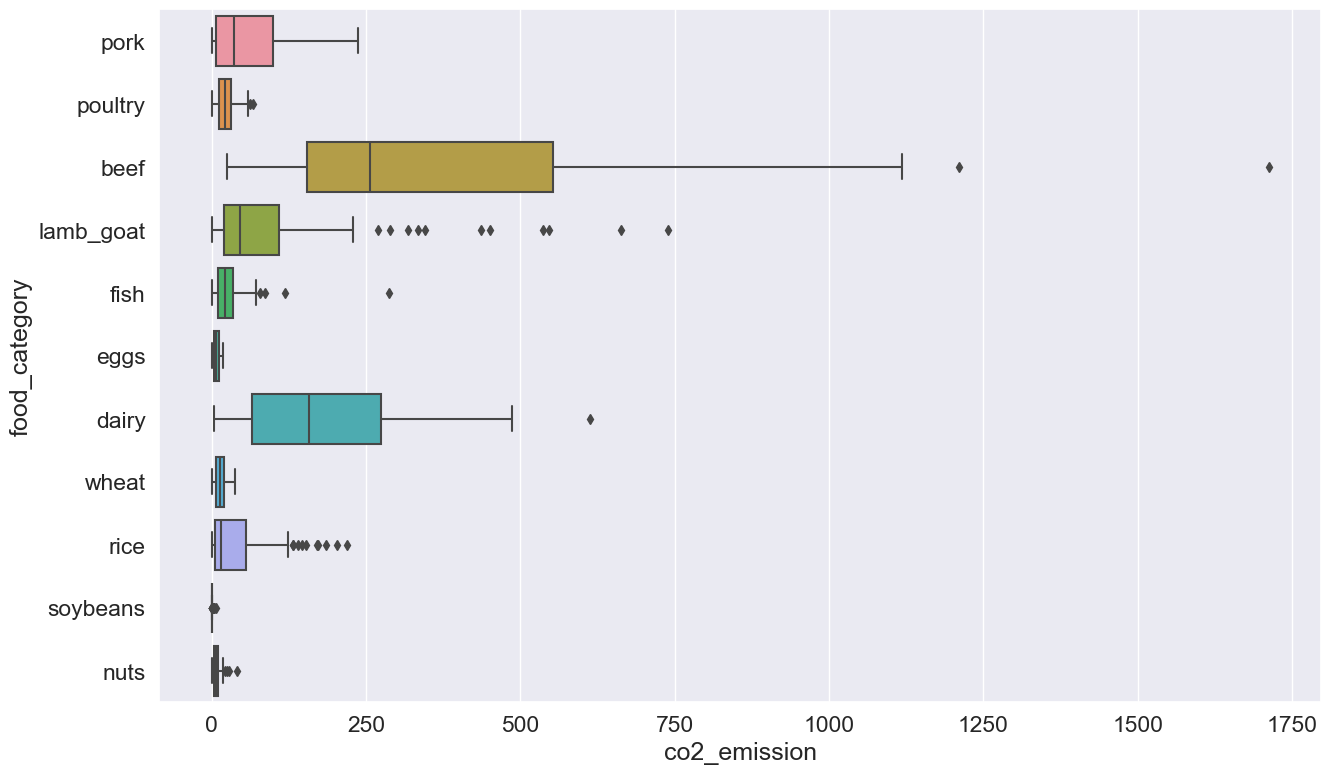

In [6]:
sns.boxplot(x='co2_emission', y='food_category', data=food)

print("By the boxplot, it's clear that the food category with highest interquartile range is beef.")

print("(Using the data, we can calculate the value:)")
quartis = food_stats["co2_emission"][["25%","50%","75%"]]
quartis["IQR"]=quartis["75%"]-quartis["25%"]
print(f"The food category which has the highest interquartile range (IQR) for CO2 emission is {quartis['IQR'].idxmax()}, which corresponds to {round(quartis['IQR'].max(),2)}.")


3. Looking at the chart from the previous question, which is the `food_category` with the highest median `co2_emission` value? 

In [7]:
print("By the previous boxplot, we can see that the food category with highest mean is beef too.")
print(f" Using the dataset as before: \n Food category with the highest median for CO2 comsumption {quartis['50%'].idxmax()} ---> {round(quartis['50%'].max(),2)}.")

By the previous boxplot, we can see that the food category with highest mean is beef too.
 Using the dataset as before: 
 Food category with the highest median for CO2 comsumption beef ---> 255.66.


4. Consider the `consumption` of "poultry" and "fish" across all available `countries`; looking at the table from question 1, the average of poultry consumption (21.22) seems to be higher than that of fish consumption (17.29), but is this difference statistically significant? Create a permutation test in order to assess the null hypothesis that there is no difference between the two means. **Do you accept or reject the null hypothesis?** Explain why. 

In [108]:
print("To perform this test, one can consider the poultry as treatment sample and fish as control samples.")
treatment = food["consumption"][food["food_category"]=="poultry"].reset_index(drop=True)
control = food["consumption"][food["food_category"]=="fish"].reset_index(drop=True)
print(treatment.head())
print(control.head())

To perform this test, one can consider the poultry as treatment sample and fish as control samples.
0    38.66
1    46.12
2    13.23
3    26.87
4    34.98
Name: consumption, dtype: float64
0     4.36
1    17.69
2     3.85
3    74.41
4    20.36
Name: consumption, dtype: float64


In [109]:
import unicodeit
print(f"Hypothesis: \n -> H\u2080: \u03BC{unicodeit.replace('_{treatment}')} = \u03BC{unicodeit.replace('_{kontrol}')} ?") #control with k because the c letter doesn't work with subcript unicodeit (????)
print(f" -> H\u2081: \u03BC{unicodeit.replace('_{treatment}')} > \u03BC{unicodeit.replace('_{kontrol}')} ?\n")

print(f" \u03BC{unicodeit.replace('_diff')} = \u03BC{unicodeit.replace('_{treatment}')} - \u03BC{unicodeit.replace('_{kontrol}')} ?")

mu_treatment = np.mean(treatment)
mu_control = np.mean(control)
mu_diff = mu_treatment - mu_control

Hypothesis: 
 -> H₀: μₜᵣₑₐₜₘₑₙₜ = μₖₒₙₜᵣₒₗ ?
 -> H₁: μₜᵣₑₐₜₘₑₙₜ > μₖₒₙₜᵣₒₗ ?

 μ_diff = μₜᵣₑₐₜₘₑₙₜ - μₖₒₙₜᵣₒₗ ?


In [110]:
df_all = pd.DataFrame({'group': ['treatment' if el <= len(treatment) else 'control' for el in range(1,(len(treatment)*2)+1)], 'responses': pd.concat([treatment,control])})

In [111]:
n = 1000 # the number of permutations chosen is not so consensual among some of the documentation I've read, so I think that considering 1000 would work for this purpose
mu_diff_samples = []
for i in range(n): 
    
    df_sample1 = df_all.sample(frac=0.5, replace=False) # 50% is the fairest
    ix2 = set(df_all.index) - set(df_sample1.index)
    df_sample2 = df_all.iloc[list(ix2)] # extract the other half
    mu_diff_temp = np.mean(df_sample1['responses']) - np.mean(df_sample2['responses']) # compute the difference between means
    mu_diff_samples.append(mu_diff_temp)

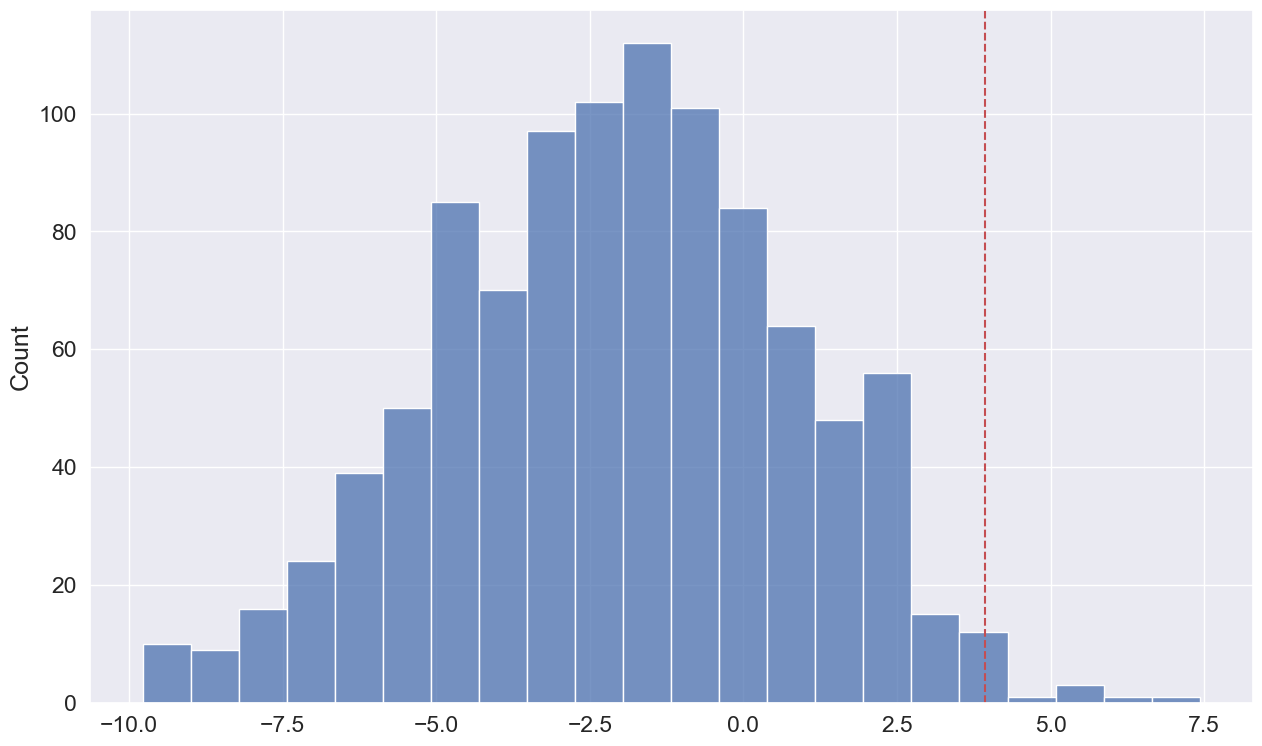

Considering those samples, we can observe that 10 of the differences calculated are higher than the difference of 2 control and treatment means, which is 3.93.
The p-value is now calculated by considering the the percentage of such differences that occurs in the total 1000 permutations:
p-value:  0.01


In [112]:
sns.histplot(mu_diff_samples)
plt.axvline(mu_diff, 0, 1, color='r', linestyle='--')
plt.show()
print(f"Considering those samples, we can observe that {sum(mu_diff_samples>mu_diff)} of the differences calculated are higher than the difference of 2 control and treatment means, which is {round(mu_diff, 2)}.")
print(f"The p-value is now calculated by considering the the percentage of such differences that occurs in the total {n} permutations:")
p_value = sum(mu_diff_samples>mu_diff)/n
print(f"p-value: ", p_value)

In [113]:
alpha = 0.05
print(f"Let's now consider a interval of confidence of 95%, one-tailed: (\u03B1={alpha}), to finally take the decision of rejecting or not the null hypothesis")

if p_value <= alpha: 
    print('R: p-value <= alpha | the observed result is statistically significant | H\u2080 rejected')
else: 
    print('R: p-value > alpha | the observed result is not statistically significant | H\u2081 accepted')

Let's now consider a interval of confidence of 95%, one-tailed: (α=0.05), to finally take the decision of rejecting or not the null hypothesis
R: p-value <= alpha | the observed result is statistically significant | H₀ rejected


### Part 2

The `world_happiness.csv` dataset from the `data` folder contains a series of variables that can be used as a proxy to a country's evaluation of its own goodness of life. The `happiness_score` metric tries to summarise how "happy" each country is. Load and save the dataset to a DataFrame object named `happy`. As always, familiarise yourself with its contents. 

In [114]:
happy = pd.read_csv('data/world_happiness.csv')
print(happy.head())
print(f"The dataset has {happy.columns.size} columns which are {happy.columns.values} and has {happy.shape[0]} records. \n\n")
null_rows=happy[happy["social_support"].isna() | happy["freedom"].isna() | happy["corruption"].isna() | happy["generosity"].isna() | happy["life_exp"].isna() | happy["happiness_score"].isna()]
#print(null_rows)
null_idxs=null_rows.index

       country  social_support  freedom  corruption  generosity  gdp_per_cap  \
0      Finland             2.0      5.0         4.0        47.0        42400   
1      Denmark             4.0      6.0         3.0        22.0        48300   
2       Norway             3.0      3.0         8.0        11.0        66300   
3      Iceland             1.0      7.0        45.0         3.0        47900   
4  Netherlands            15.0     19.0        12.0         7.0        50500   

   life_exp  happiness_score  
0      81.8              155  
1      81.0              154  
2      82.6              153  
3      83.0              152  
4      81.8              151  
The dataset has 8 columns which are ['country' 'social_support' 'freedom' 'corruption' 'generosity'
 'gdp_per_cap' 'life_exp' 'happiness_score'] and has 143 records. 




5. Using a histogram, plot the distribution of the `happiness_score` variable, **which distribution does it resemble?** *(in the answer sheet write the [name of the distribution](https://miro.medium.com/max/962/1*DmPUIjvecL7KllOamoFSDw.png) that best fits the data)* 

R: This is very close from an uniform distribution.


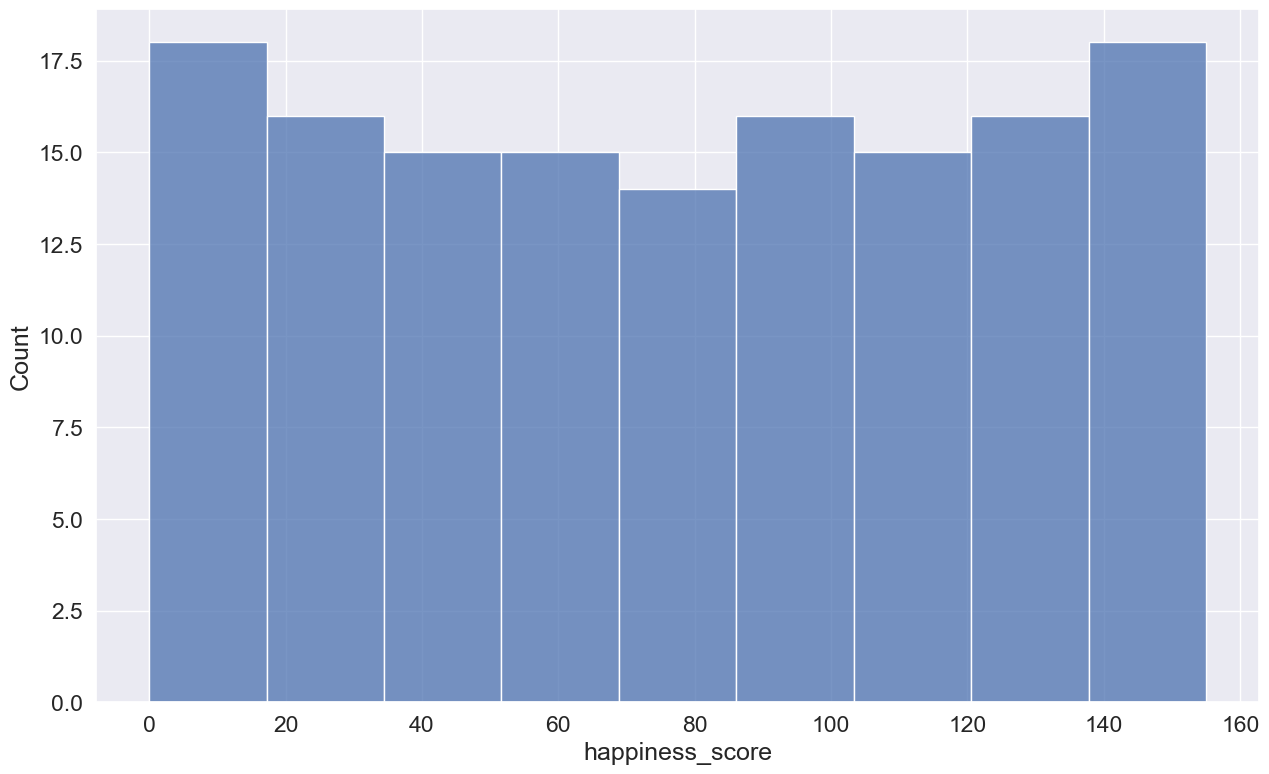

In [32]:
sns.histplot(happy["happiness_score"])
print("R: This is very close from an uniform distribution.")

6. Plot a correlation matrix (or a correlation heatmap) between all the numeric variables in the dataset. **Which variable is the least correlated with the `happiness_score` metric?** 

In [116]:
happy[['social_support' ,'freedom' ,'corruption', 'generosity','gdp_per_cap' ,'life_exp' ,'happiness_score']].corr()

,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
social_support,1.000000,0.470893,0.154848,0.449225,-0.687268,-0.705512,-0.824702
freedom,0.470893,1.000000,0.387234,0.493207,-0.444420,-0.388856,-0.567582
corruption,0.154848,0.387234,1.000000,0.305043,-0.335716,-0.135665,-0.215308
generosity,0.449225,0.493207,0.305043,1.000000,-0.531636,-0.433144,-0.499259
gdp_per_cap,-0.687268,-0.444420,-0.335716,-0.531636,1.000000,0.701955,0.727973
life_exp,-0.705512,-0.388856,-0.135665,-0.433144,0.701955,1.000000,0.780225
happiness_score,-0.824702,-0.567582,-0.215308,-0.499259,0.727973,0.780225,1.000000


In [117]:
corr_matrix=happy[['social_support' ,'freedom' ,'corruption', 'generosity','gdp_per_cap' ,'life_exp' ,'happiness_score']].corr()
min_variable=abs(corr_matrix['happiness_score']).idxmin()
print(f"R: The variable that is least correlated with the happiness score is {min_variable} --> corr={round(corr_matrix['happiness_score'].loc[min_variable],4)}")

R: The variable that is least correlated with the happiness score is corruption --> corr=-0.2153


7. You may have noticed that the `corruption` metric has some missing values. **How many countries have a missing corruption value?** After you've answered the question, replace all missing values *in all columns of the DataFrame* with the *respective column's mean value*. 

In [34]:
print(f"R: There were {happy[happy['corruption'].isna()].shape[0]} countries that were missing corruption values")
happy["corruption"]=happy["corruption"].fillna(np.mean(happy["corruption"]))

R: There were 8 countries that were missing corruption values


8. Use the `statsmodel` package to create a linear regression model where you use `life_exp` to predict the `happiness_score`. After [refreshing your memory on how to interpret a regression coefficient](https://statisticsbyjim.com/regression/interpret-coefficients-p-values-regression/#:~:text=The%20coefficient%20value%20signifies%20how,in%20isolation%20from%20the%20others.), answer the following question: given the model you just created, **a 1-year increase in life expectancy corresponds to an increase of how many points of the happiness score variable?**. 

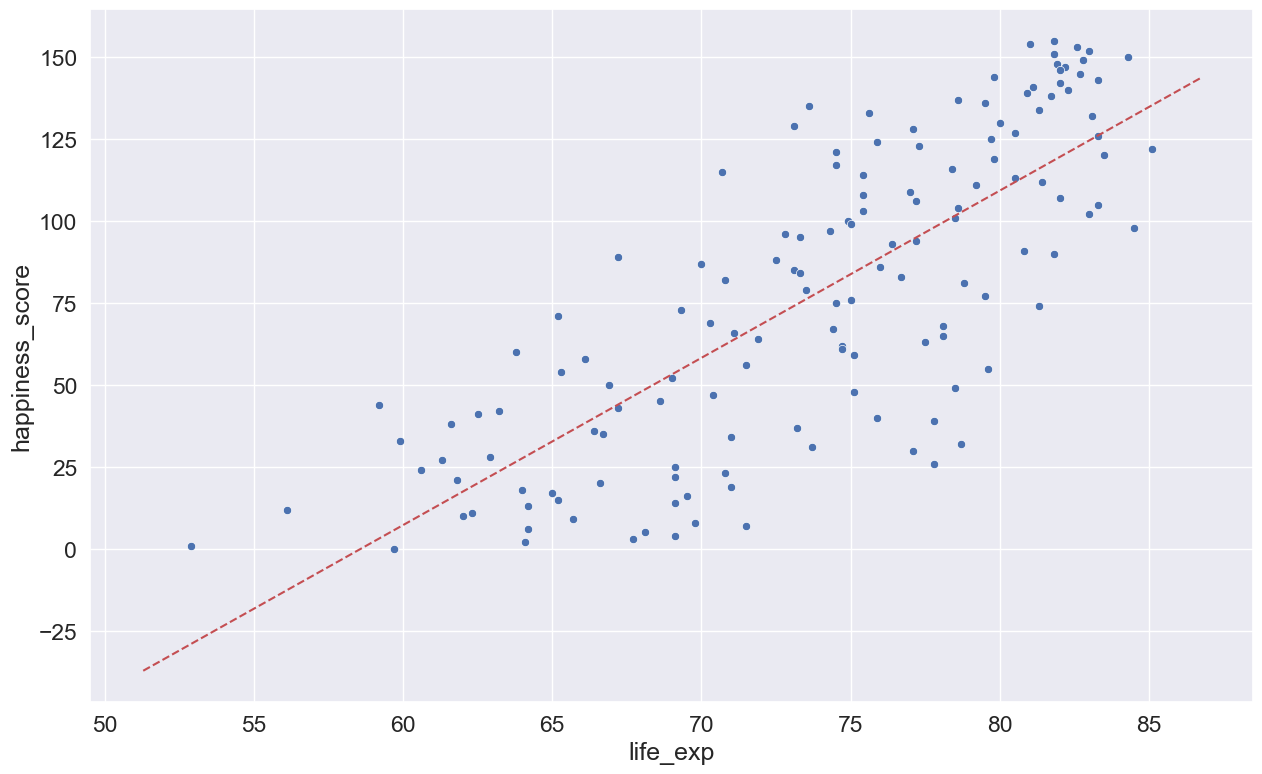

                            OLS Regression Results                            
Dep. Variable:        happiness_score   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     219.4
Date:                Sat, 28 Oct 2023   Prob (F-statistic):           1.59e-30
Time:                        17:44:33   Log-Likelihood:                -683.97
No. Observations:                 143   AIC:                             1372.
Df Residuals:                     141   BIC:                             1378.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -298.8710     25.536    -11.704      0.0

In [119]:
import statsmodels.api as sm
import sklearn.metrics as sk

sns.scatterplot(x='life_exp', y='happiness_score', data=happy)

intercept = -298.8710
slope = 5.1021

axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, '--', color='r')

plt.show()

Y = happy['happiness_score']
X = happy['life_exp']
X = sm.add_constant(X)   # add a constant to the model
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

print(f"The p-value of life_exp is lower than the significance level (even considering 1%), so that dependent variable should be considered in the model, as soon as it has impact on the value of independent varible (happiness_score).")
print(f"R: According to summary table, the coefficient associate with life_exp is 5.102, and that's exactly the increased proportion of happiness score for each 1-year increasement in life expectation.")

9. Split the dataset in `train` and `test` sets, leaving 33% of the data in the latter. Then, using the `sklearn` or `statsmodel` package, train a linear regression model where you try to predict the `happiness_score` using the following set of predictors: `['social_support', 'freedom', 'generosity', 'life_exp']` *(use a `random_state=42`)*. Calculate the R-squared on the train set and compare it with the R-squared based on the test set. **Would you say that the model is overfitting the training data?** Explain your answer. 

In [120]:
happy = happy[~pd.isna(happy['happiness_score'])]
happy = happy.fillna(0)
happy.corr(numeric_only=True)['happiness_score'].sort_values(ascending=False)

happiness_score    1.000000
life_exp           0.780225
gdp_per_cap        0.727973
corruption        -0.240306
generosity        -0.505002
freedom           -0.572281
social_support    -0.825828
Name: happiness_score, dtype: float64

In [122]:
Y = happy['happiness_score']
X = happy[['social_support', 'freedom', 'generosity', 'life_exp']]

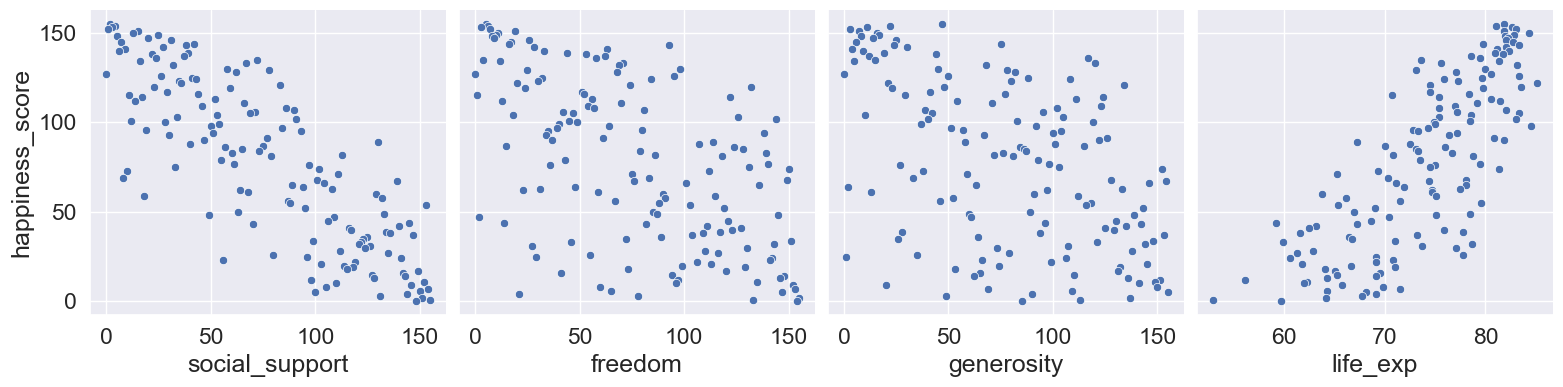

In [123]:
# Visualise scatter plot of each one of the dependent variables separately VS dependent variable Y
sns.pairplot(happy, x_vars=['social_support', 'freedom', 'generosity', 'life_exp'], y_vars = 'happiness_score', size = 4, kind = 'scatter' )

In [124]:
from sklearn.model_selection import train_test_split

# Perform Linear Regression
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the regression line using 'OLS'
model_train = sm.OLS(Y_train,X_train_sm)
results_train = model_train.fit()

# Show model's summary 
results_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        happiness_score   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     82.10
Date:                Sat, 28 Oct 2023   Prob (F-statistic):           3.39e-29
Time:                        17:45:14   Log-Likelihood:                -426.46
No. Observations:                  95   AIC:                             862.9
Df Residuals:                      90   BIC:                             875.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.3763     38.767      0.036      0.972     -75.642      78.395
social_support    -0.5119      0.073     -7.025      0.000      -0.657      -0.367
freedom           -0.1786      0.060     -2.966      0.004      -0.298      -0.059
generosity        -0.0518      0.061     -0.847      0.399      -0.173       0.070
life_exp           1.8109      0.459      3.942      0.000       0.898       2.724
==============================================================================
Omnibus:                        1.025   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.599   Jarque-Bera (JB):                0.523
Skew:                          -0.042   Prob(JB):                        0.770
Kurtosis:                       3.354   Cond. No.                     2.84e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
# Performing predictions on the test set
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

In [127]:
# Predict the Y values corresponding to X_test_sm
pred_test = results_train.predict(X_test_sm)

# R-squared value from train model and from the preditected Y from test set
print(f"R-square train set: {round(results_train.rsquared,4)}")
print(f"R-square test set: {round(sk.r2_score(Y_test,pred_test),4)}")
print(f"Both values indicate that the model is a good fit.")
if results_train.rsquared > sk.r2_score(Y_test,pred_test):
    print("R: R-square train > R-square test --> The model is overfitting.")
else:
    print("R: R-square train < R-square test --> It means that the training data doesn't overfits the model.")



R-square train set: 0.7849
R-square test set: 0.7872
Both values indicate that the model is a good fit.
R: R-square train < R-square test --> It means that the training data doesn't overfits the model.


10. Using the same model from the previous question, **calculate the MAE on the testing set and report it on the answers Sheet.** Are you satisfied with the model's performance?

Naïve Training MAE: 40.38
Training MAE: 16.92
MASE: 0.419 --> MASE < 1 --> algorithm is performing fine compared with naive forecast


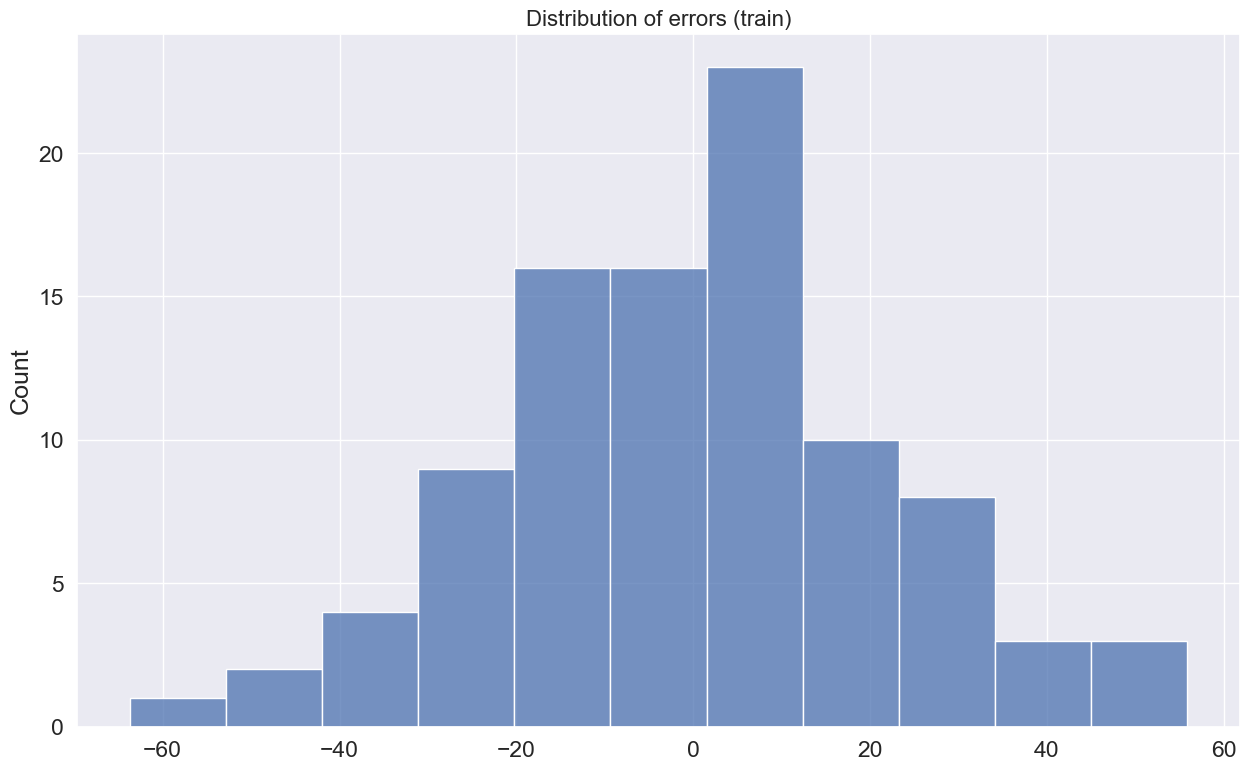

In [62]:
def mae(Y, Y_hat): 
    return round(np.mean(np.abs(Y - Y_hat)), 2)

#Using train data set
pred_train = results_train.predict(X_train_sm)

print(f'Naïve Training MAE: {mae(Y_train, np.mean(Y_train))}') 
print(f'Training MAE: {mae(Y_train, pred_train)}') 
mase_train = round(mae(Y_train, pred_train)/mae(Y_train, np.mean(Y_train)),4)
if (mase_train>1):
    print(f"MASE: {mase_train} --> MASE > 1 --> algorithm is performing poorly compared with naive forecast")
else:
    print(f"MASE: {mase_train} --> MASE < 1 --> algorithm is performing fine compared with naive forecast")

sns.histplot(Y_train - pred_train).set_title("Distribution of errors (train)", size=16)
plt.show()

Naïve Test MAE: 39.94
Test MAE: 17.18
MASE: 0.4301 --> MASE < 1 --> algorithm is performing fine compared with naive forecast
R: Looking for MAE value, we can conclude that the performance of the model is good.       
 The values of training data and testing data are similar, being the training strictly lower than the other. So I'm satisfied..


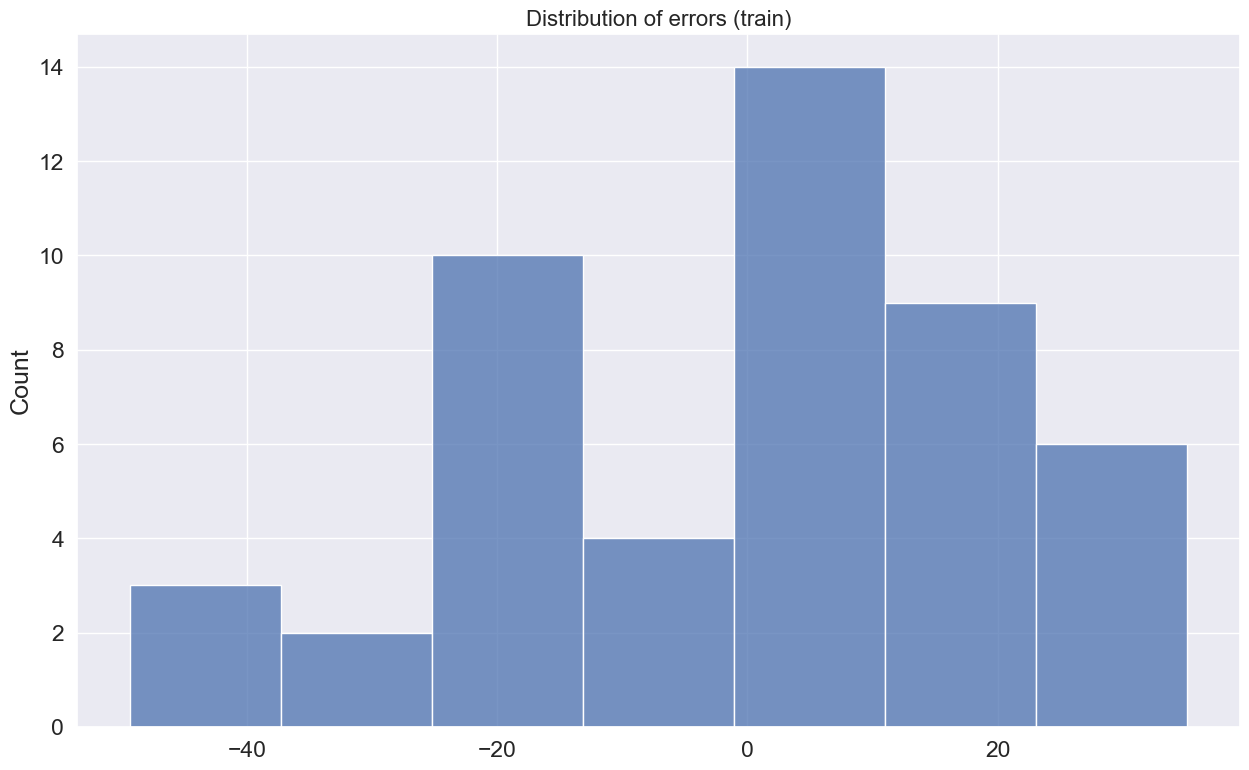

In [132]:
#Using test data set
print(f'Naïve Test MAE: {mae(Y_test, np.mean(Y_test))}') 
print(f'Test MAE: {mae(Y_test, pred_test)}') 
mase_test = round(mae(Y_test, pred_test)/mae(Y_test, np.mean(Y_test)),4)
if (mase_test>1):
    print(f"MASE: {mase_test} --> MASE > 1 --> algorithm is performing poorly compared with naive forecast")
else:
    print(f"MASE: {mase_test} --> MASE < 1 --> algorithm is performing fine compared with naive forecast")

#MASE was not asked but I found interesting to calculate too and looking for this matric, I'm satisfied with model's performance because value of MASE is less then 1.
print(f"R: Looking for MAE value, we can conclude that the performance of the model is good. \
      \n The values of training data and testing data are similar, being the training strictly lower than the other. So I'm satisfied..")

sns.histplot(Y_test - pred_test).set_title("Distribution of errors (train)", size=16)
plt.show()

### Bonus

11. <span style="color:red">[BONUS]</span> **Do you notice anything strange when looking at the regression coefficients of the model in the previous answer?** (answer here, not on the response Google Sheet)

In [133]:
print("I really cann't see nothing strange because those coeficients only indicate the strenght of relationship between the dependent and independent varibales.")
print("Life expectation has the strongest relationship among all the other variables and corruption as well as freedom don't have so much 'importance', being freedom very close to 0.")

I really cann't see nothing strange because those coeficients only indicate the strenght of relationship between the dependent and independent varibales.
Life expectation has the strongest relationship among all the other variables and corruption as well as freedom don't have so much 'importance', being freedom very close to 0.


12. <span style="color:red">[BONUS]</span> The code in the following cell creates a forecasting model using the `prophet` library. Specifically, it fits an additive model (the effect of the seasonality is added to the trend in order to get forecasts) on a dataframe `df` which contains the number of airline passengers over time. Notice how the seasonality in the forecast is too large at the start of the time series and too small at the end (compared to the data it tries to fit). **Modify the Prophet code to account for the effect of growing seasonality.** 

19:13:23 - cmdstanpy - INFO - Chain [1] start processing
19:13:23 - cmdstanpy - INFO - Chain [1] done processing
19:13:23 - cmdstanpy - INFO - Chain [1] start processing
19:13:23 - cmdstanpy - INFO - Chain [1] done processing
19:13:23 - cmdstanpy - INFO - Chain [1] start processing
19:13:23 - cmdstanpy - INFO - Chain [1] done processing


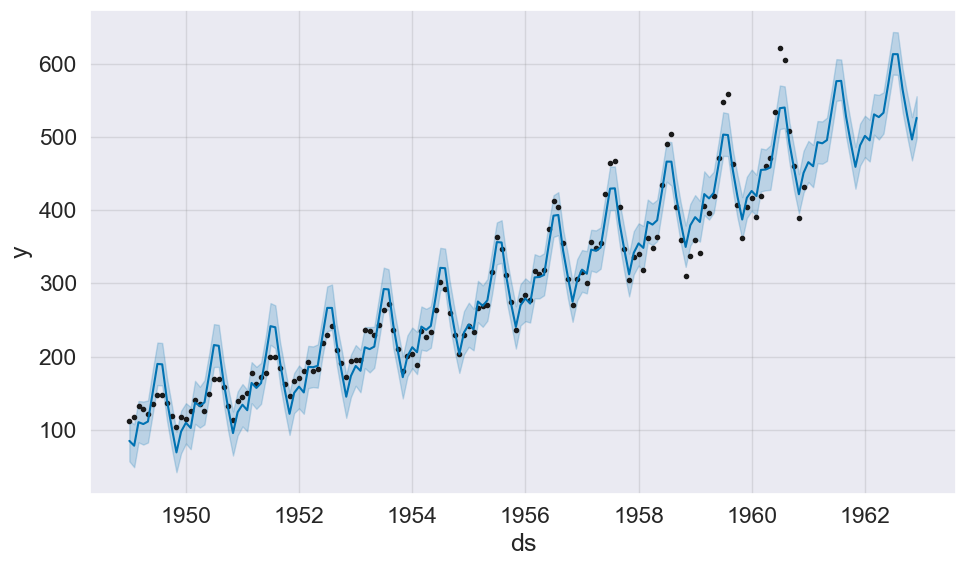

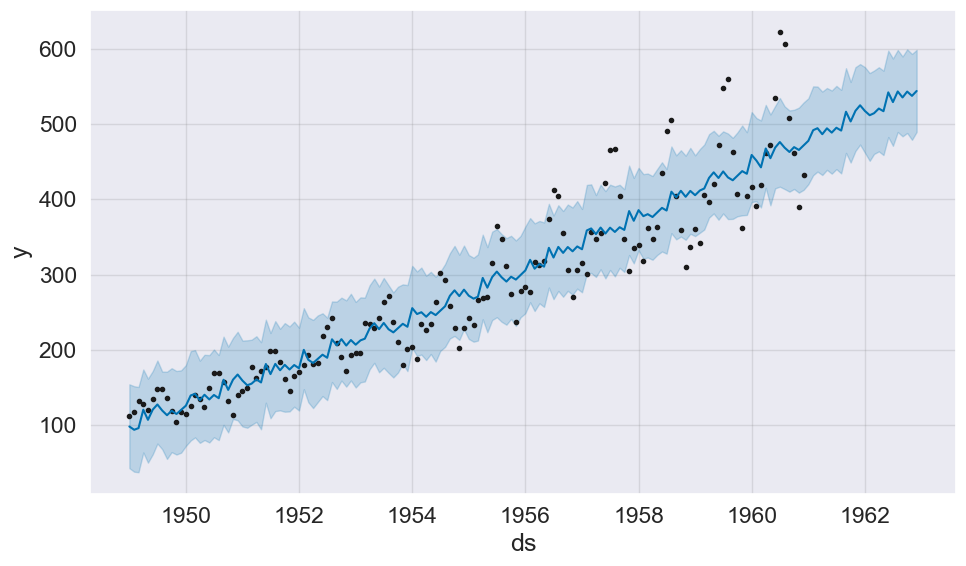

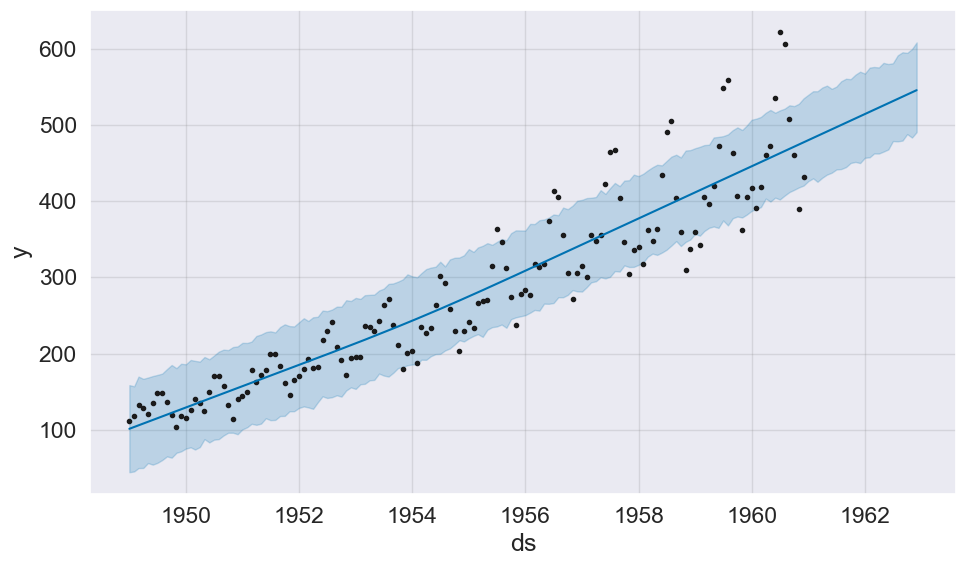

In [160]:
# DO NOT DELETE >>> RUN THIS CELL!

from prophet import Prophet

df = pd.read_csv('data/air-passengers.csv')

m1 = Prophet( 
        yearly_seasonality=True, 
        weekly_seasonality=False, 
        daily_seasonality=False).add_seasonality(name='yearly', period=365, fourier_order = 10)
m1.fit(df)
future = m1.make_future_dataframe(24, freq='MS')
forecast = m1.predict(future)
fig = m1.plot(forecast)

m2 = Prophet( 
        yearly_seasonality=False, 
        weekly_seasonality=True, 
        daily_seasonality=False).add_seasonality(name='weekly', period=365/52, fourier_order = 3)
m2.fit(df)
future = m2.make_future_dataframe(24, freq='MS')
forecast = m2.predict(future)
fig = m2.plot(forecast)

m2 = Prophet( 
        yearly_seasonality=False, 
        weekly_seasonality=False, 
        daily_seasonality=True).add_seasonality(name='daily', period=1, fourier_order = 4)
m2.fit(df)
future = m2.make_future_dataframe(24, freq='MS')
forecast = m2.predict(future)
fig = m2.plot(forecast)


